In [5]:
import os
from pathlib import Path
import torchaudio
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt

def run_eda(label_dir: str, audio_dir: str):
    label_dir = Path(label_dir)
    audio_dir = Path(audio_dir)

    # ====== STEP 1: Ghép audio - transcript ======
    txt_files = sorted(label_dir.glob("*.txt"))
    print(f"📂 Found {len(txt_files)} label files in: {label_dir}")

    matched_samples = []
    for txt_path in txt_files:
        base_name = txt_path.stem
        wav_path = audio_dir / f"{base_name}.wav"
        if wav_path.exists():
            matched_samples.append((wav_path, txt_path))
        else:
            print(f"⚠️ Missing audio for: {base_name}")

    print(f"✅ Matched {len(matched_samples)} audio-transcript pairs.\n")

    # ====== STEP 2: EDA per sample ======
    stats = []
    for wav_path, txt_path in matched_samples:
        waveform, sr = torchaudio.load(wav_path)
        duration_sec = waveform.shape[1] / sr

        try:
            with open(txt_path, "r", encoding="utf-8") as f:
                text = f.read().strip()
                if len(text) == 0:
                    print(f"⚠️ Empty transcript for: {Path(txt_path).resolve()}")
        except Exception as e:
            print(f"❌ Error reading {txt_path}: {e}")
            text = ""

        stats.append({
            "filename": wav_path.name,
            "duration_sec": duration_sec,
            "text_length_char": len(text),
            "text_length_word": len(text.split()),
            "is_empty": len(text.strip()) == 0,
        })

    df_stats = pd.DataFrame(stats)

    # ====== STEP 3: PrettyTable summary ======
    total = len(df_stats)
    num_empty = df_stats['is_empty'].sum()
    duration = df_stats['duration_sec']
    char_len = df_stats['text_length_char']
    word_len = df_stats['text_length_word']

    table = PrettyTable()
    table.title = "📊 EDA Summary for Transcripts"
    table.field_names = ["Metric", "Value"]
    table.add_row(["Tổng số sample", total])
    table.add_row(["Số transcript rỗng", num_empty])
    table.add_row(["% transcript rỗng", f"{100*num_empty/total:.2f}%"])
    table.add_row(["Audio - Min (s)", f"{duration.min():.2f}"])
    table.add_row(["Audio - Max (s)", f"{duration.max():.2f}"])
    table.add_row(["Audio - Mean (s)", f"{duration.mean():.2f}"])
    table.add_row(["Audio - Median (s)", f"{duration.median():.2f}"])
    table.add_row(["Text (char) - Min", char_len.min()])
    table.add_row(["Text (char) - Max", char_len.max()])
    table.add_row(["Text (char) - Mean", f"{char_len.mean():.2f}"])
    table.add_row(["Text (word) - Min", word_len.min()])
    table.add_row(["Text (word) - Max", word_len.max()])
    table.add_row(["Text (word) - Mean", f"{word_len.mean():.2f}"])

    print(table)

    # ====== STEP 4: Histogram plots ======
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    df_stats['duration_sec'].hist(bins=40)
    plt.title("Phân bố độ dài audio (giây)")

    plt.subplot(1, 2, 2)
    df_stats['text_length_word'].hist(bins=40)
    plt.title("Phân bố độ dài transcript (số từ)")

    plt.tight_layout()
    plt.show()




📂 Found 1327 label files in: ../archive/transcripts_corrected_quangdm4_cutoff_17_07/transcripts_corrected
⚠️ Missing audio for: .progress
✅ Matched 1326 audio-transcript pairs.

⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/archive/transcripts_corrected_quangdm4_cutoff_17_07/transcripts_corrected/E_thaond3_D_2025-03-03_H_144045_853_CLID_0975932252___000008438___right___000009226.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/archive/transcripts_corrected_quangdm4_cutoff_17_07/transcripts_corrected/E_thaond3_D_2025-03-03_H_144045_853_CLID_0975932252___000020438___right___000021962.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/archive/transcripts_corrected_quangdm4_cutoff_17_07/transcripts_corrected/E_thaond3_D_2025-03-04_H_080317_618_CLID_0976878071___000002550___right___000003786.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/archive/transcripts_corrected_quangdm4_cutoff_17_07/transcripts_corrected/E_thaond3_D_2025-03-04_H_080317_618_CLID_097687807

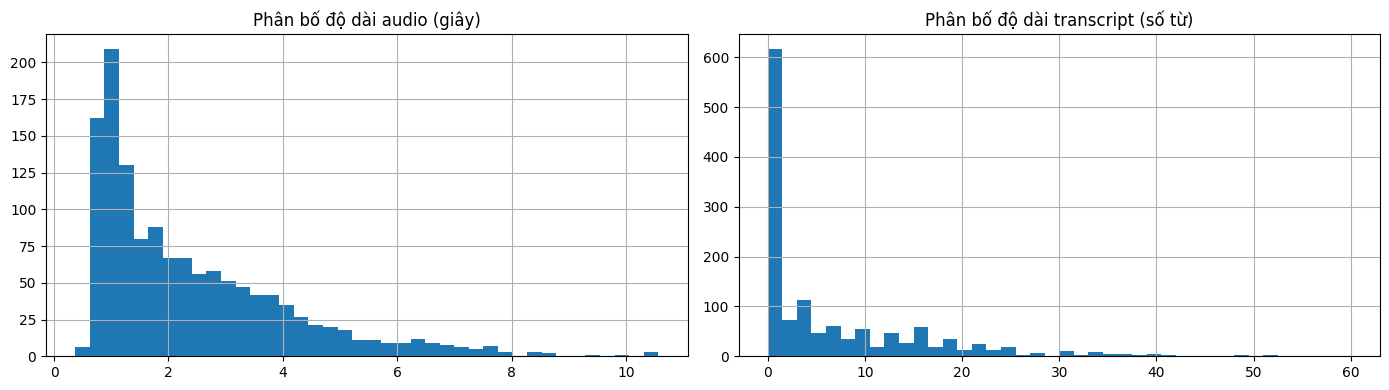

In [6]:
# ==== Example usage ====
label_dir = "../archive/transcripts_corrected_quangdm4_cutoff_17_07/transcripts_corrected"
audio_dir = "../archive/tts_dataset_best_call_agent_audio/tts_dataset_best_call_agent_audio/wavs"
run_eda(label_dir, audio_dir)


📂 Found 2725 label files in: ../label/transcripts_corrected_quangdm4_cutoff_21_7/transcripts_corrected
⚠️ Missing audio for: .progress
✅ Matched 2724 audio-transcript pairs.

⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcripts_corrected_quangdm4_cutoff_21_7/transcripts_corrected/E_thaond3_D_2025-03-03_H_144045_853_CLID_0975932252___000008438___right___000009226.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcripts_corrected_quangdm4_cutoff_21_7/transcripts_corrected/E_thaond3_D_2025-03-03_H_144045_853_CLID_0975932252___000020438___right___000021962.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcripts_corrected_quangdm4_cutoff_21_7/transcripts_corrected/E_thaond3_D_2025-03-04_H_080317_618_CLID_0976878071___000002550___right___000003786.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcripts_corrected_quangdm4_cutoff_21_7/transcripts_corrected/E_thaond3_D_2025-03-04_H_080317_618_CLID_0976878071___000012310__

⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcripts_corrected_quangdm4_cutoff_21_7/transcripts_corrected/E_thaond3_D_2025-03-05_H_104301_937_CLID_0339078638___000019734___right___000022762.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcripts_corrected_quangdm4_cutoff_21_7/transcripts_corrected/E_thaond3_D_2025-03-05_H_104301_937_CLID_0339078638___000029942___right___000031690.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcripts_corrected_quangdm4_cutoff_21_7/transcripts_corrected/E_thaond3_D_2025-03-05_H_104301_937_CLID_0339078638___000031830___right___000033066.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcripts_corrected_quangdm4_cutoff_21_7/transcripts_corrected/E_thaond3_D_2025-03-05_H_104301_937_CLID_0339078638___000033014___right___000035114.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcripts_corrected_quangdm4_cutoff_21_7/transcripts_corrected/E_thaond3_D_2025-03-05_H_104

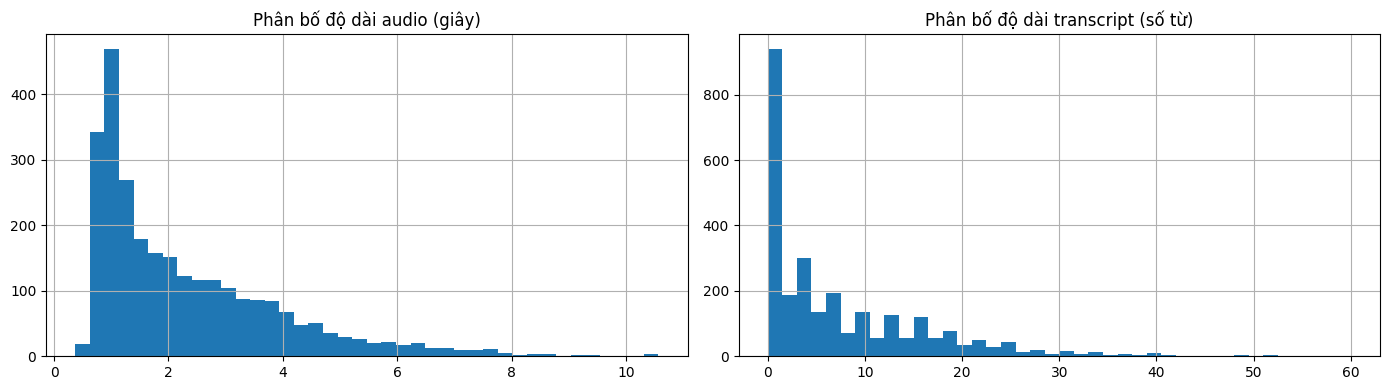

In [7]:
# ==== Example usage ====
label_dir = "../label/transcripts_corrected_quangdm4_cutoff_21_7/transcripts_corrected"
audio_dir = "../archive/tts_dataset_best_call_agent_audio/tts_dataset_best_call_agent_audio/wavs"
run_eda(label_dir, audio_dir)


📂 Found 1899 label files in: ../label/transcript_corrected_hieudm13_cutoff_20250721/transcript_corrected
⚠️ Missing audio for: .progress
✅ Matched 1898 audio-transcript pairs.

⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcript_corrected_hieudm13_cutoff_20250721/transcript_corrected/E_huongds_D_2025-04-01_H_092355_092_CLID_0961057966___000004342___right___000005162.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcript_corrected_hieudm13_cutoff_20250721/transcript_corrected/E_huongds_D_2025-04-01_H_092355_092_CLID_0961057966___000004918___right___000008280.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcript_corrected_hieudm13_cutoff_20250721/transcript_corrected/E_huongds_D_2025-04-02_H_091256_551_CLID_0914881402___000001494___right___000002410.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcript_corrected_hieudm13_cutoff_20250721/transcript_corrected/E_huongds_D_2025-04-02_H_105015_698_CLID_0913266599___0

⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcript_corrected_hieudm13_cutoff_20250721/transcript_corrected/E_huongds_D_2025-04-04_H_161547_233_CLID_0812372666___000420726___right___000421450.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcript_corrected_hieudm13_cutoff_20250721/transcript_corrected/E_huongds_D_2025-04-04_H_161547_233_CLID_0812372666___000438070___left___000438794.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcript_corrected_hieudm13_cutoff_20250721/transcript_corrected/E_huongds_D_2025-04-04_H_161547_233_CLID_0812372666___000441206___right___000442090.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcript_corrected_hieudm13_cutoff_20250721/transcript_corrected/E_huongds_D_2025-04-04_H_162552_103_CLID_0963898171___000006870___right___000007658.txt
⚠️ Empty transcript for: /home/kylh/work/vpb_dataset/label/transcript_corrected_hieudm13_cutoff_20250721/transcript_corrected/E_huongds_D_2025-04

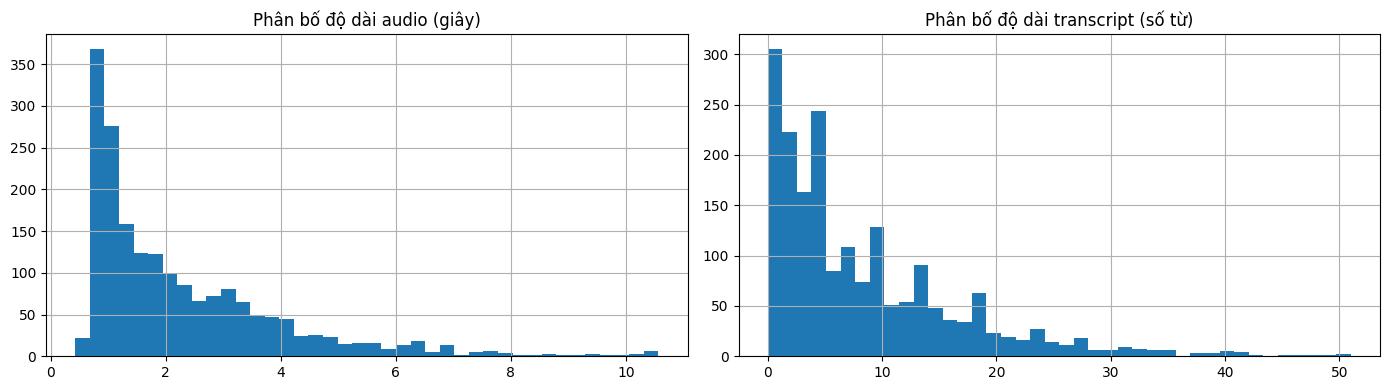

In [8]:
# ==== Example usage ====
label_dir = "../label/transcript_corrected_hieudm13_cutoff_20250721/transcript_corrected"
audio_dir = "../archive/tts_dataset_best_call_agent_audio/tts_dataset_best_call_agent_audio/wavs"
run_eda(label_dir, audio_dir)
